In [1]:
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings("ignore")

In [2]:
from Classes.cognitive_model_agents import QAttendance

In [3]:
DASH_LINE = '-'*60
fixed_parameters = {
	"threshold":0.5,
	"num_agents":2,
}
free_parameters = {
	"learning_rate": 0.1,
	"discount_factor": 0.7,
	"go_drive":0,
	"inverse_temperature":32
}
agent = QAttendance(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True

In [4]:
print('')
print(DASH_LINE)
print('Test bar is full')
print(DASH_LINE)    
action = 1
state = [action, 1]
print('Initial state:', state)
agent.decisions.append(action)
agent.prev_state_ = tuple(state)
for i in range(10):
	print(f'---------- Round {i} ----------')
	preferences = agent.determine_action_preferences(state)
	print(f'Action preferences in state {state}: {preferences}')
	probabilities = agent.softmax(preferences)
	print('Action probabilities:', probabilities)
	action = agent.make_decision()
	print('Chosen action:', action)
	new_state = [action, 1]
	state = new_state
	print('State arrived:', new_state)
	payoff = agent.payoff(action, state)
	print(f'Payoff action {action}: {payoff}')
	agent.update(payoff, state)
	agent.prev_state_ = tuple(state)  


------------------------------------------------------------
Test bar is full
------------------------------------------------------------
Initial state: [1, 1]
---------- Round 0 ----------
Action preferences in state [1, 1]: [0. 0.]
Action probabilities: [0.5 0.5]
Probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 1]
Payoff action 1: -1
Discounted average go frequency: 0.7
Reward: -1
Reward with average go frequency: -0.30000000000000004
Learning rule:
Q[(1, 1),1] <- 0.0 + 0.1 * (-0.30000000000000004 - 0.0)
Q[(1, 1),1] = -0.030000000000000006
---------- Round 1 ----------
Action preferences in state [1, 1]: [ 0.   -0.03]
Action probabilities: [0.72312181 0.27687819]
Probabilities:
no go:0.7231218051243898 ---- go:0.27687819487561016
Chosen action: 0
State arrived: [0, 1]
Payoff action 0: 0
Discounted average go frequency: 1.19
Reward: 0
Reward with average go frequency: 1.19
Learning rule:
Q[(1, 1),0] <- 0.0 + 0.1 * (1.19 - 0.0)
Q[(1, 1),0] = 0.119
---------- R

In [5]:
print('')
print(DASH_LINE)
print('Test bar has capacity')
print(DASH_LINE) 
agent = QAttendance(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
action = 1
state = [action, 0]
print('Initial state:', state)
agent.decisions.append(action)
agent.prev_state_ = tuple(state)
for i in range(10):
	print(f'---------- Round {i} ----------')
	preferences = agent.determine_action_preferences(state)
	print(f'Action preferences in state {state}: {preferences}')
	probabilities = agent.softmax(preferences)
	print('Action probabilities:', probabilities)
	action = agent.make_decision()
	print('Chosen action:', action)
	new_state = [action, 0]
	state = new_state
	print('State arrived:', new_state)
	payoff = agent.payoff(action, state)
	print(f'Payoff action {action}: {payoff}')
	agent.update(payoff, state)
	agent.prev_state_ = tuple(state)


------------------------------------------------------------
Test bar has capacity
------------------------------------------------------------
Initial state: [1, 0]
---------- Round 0 ----------
Action preferences in state [1, 0]: [0. 0.]
Action probabilities: [0.5 0.5]
Probabilities:
no go:0.5 ---- go:0.5
Chosen action: 1
State arrived: [1, 0]
Payoff action 1: 1
Discounted average go frequency: 0.7
Reward: 1
Reward with average go frequency: 1.7
Learning rule:
Q[(1, 0),1] <- 0.0 + 0.1 * (1.7 - 0.0)
Q[(1, 0),1] = 0.17
---------- Round 1 ----------
Action preferences in state [1, 0]: [0.   0.17]
Action probabilities: [0.00432073 0.99567927]
Probabilities:
no go:0.004320733519911917 ---- go:0.9956792664800881
Chosen action: 1
State arrived: [1, 0]
Payoff action 1: 1
Discounted average go frequency: 1.19
Reward: 1
Reward with average go frequency: 2.309
Learning rule:
Q[(1, 0),1] <- 0.17 + 0.1 * (2.309 - 0.17)
Q[(1, 0),1] = 0.3839
---------- Round 2 ----------
Action preferences in stat

In [6]:
from pathlib import Path
from Utils.interaction import Performer

image_folder = Path('../../images/QAttendance')
image_folder.mkdir(parents=True, exist_ok=True)

simulation_parameters = {
	'num_episodes':100,
	'num_rounds':100,
	'verbose':False
}

LaTeX_string = Performer.simple_plots(
	agent_class=QAttendance,
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	simulation_parameters=simulation_parameters,
	measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy'],
	image_folder=image_folder
)

In [7]:
from Utils.interaction import Experiment

exp = Experiment(
    agent_class=QAttendance,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy']
)

In [12]:
import numpy as np

n_points = 10
exp.run_sweep2(
    parameter1='discount_factor',
    values1=[x for x in np.logspace(-2, 0, n_points)],
    parameter2='inverse_temperature',
    values2=[2**x for x in np.linspace(3, 6, n_points)],
    file=image_folder / 'sweep_discount_vs_temperature'
)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
from Utils.plot_utils import PlotsAndMeasures

p = PlotsAndMeasures(exp.data)

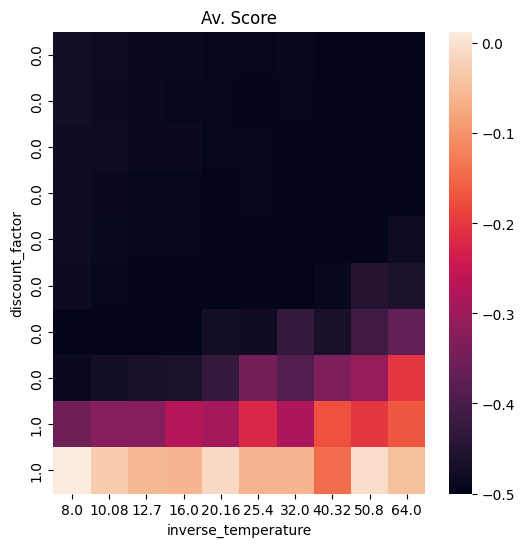

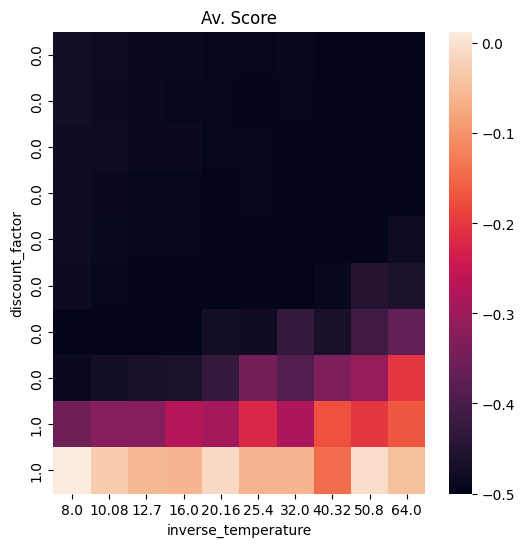

In [14]:
p.plot_scores_sweep2('discount_factor', 'inverse_temperature')